# Canonical Grover Search on Quantum Devices
## Qiskit codes for GSA columns in Fig. 6 and 7

In [1]:
import qiskit.tools.jupyter

%qiskit_version_table

In [3]:
from qiskit import *
from qiskit import IBMQ, transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_circuit_layout

from qiskit.providers.jobstatus import JobStatus
from qiskit.tools.monitor import job_monitor

from utils import *
from circuit_func import *

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider(YOUR_PROVIDER)

ibmqfactory.load_account:WARNING:2022-12-16 20:41:20,631: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
n=6

# solutions : [Least Significant <-> Most Singnificant]
sol = [0,1,1,0,1]
shots = 8192

In [11]:
def qc_D5M5(sol):

    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(5, 'c')
    
    sol = np.insert(sol,1,2)

    qc = QuantumCircuit(q, c)  # 0 applications of Q, only a single A operator

    addH(qc, q, [0,2,3,4,5]) # Qubit 0,2,3,4 are the wroking qubits. Qubit 1 is the ancillary qubit.


    oracle(qc,q,[0,1,2,3,4,5],sol)


    diffusion_5q(qc, q, [0,1,2,3,4,5])


    qc.measure(q[0],c[0])
    qc.measure(q[2],c[1])
    qc.measure(q[3],c[2])
    qc.measure(q[4],c[3])
    qc.measure(q[5],c[4])
    
    #qc_trans = qiskit.transpile(qc, backend=trans_backend, optimization_level=3, initial_layout = trans_layout)
    
    return qc

def qc_D5D5M5(sol):

    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(5, 'c')
    
    sol = np.insert(sol,1,2)

    qc = QuantumCircuit(q, c)  # 0 applications of Q, only a single A operator

    addH(qc, q, [0,2,3,4,5]) # Qubit 0,2,3,4 are the wroking qubits. Qubit 1 is the ancillary qubit.


    oracle(qc,q,[0,1,2,3,4,5],sol)


    diffusion_5q(qc, q, [0,1,2,3,4,5])
    
    oracle(qc,q,[0,1,2,3,4,5],sol)


    diffusion_5q(qc, q, [0,1,2,3,4,5])


    qc.measure(q[0],c[0])
    qc.measure(q[2],c[1])
    qc.measure(q[3],c[2])
    qc.measure(q[4],c[3])
    qc.measure(q[5],c[4])
    
    #qc_trans = qiskit.transpile(qc, backend=trans_backend, optimization_level=3, initial_layout = trans_layout)
    
    return qc


# D5M5 circuits

89


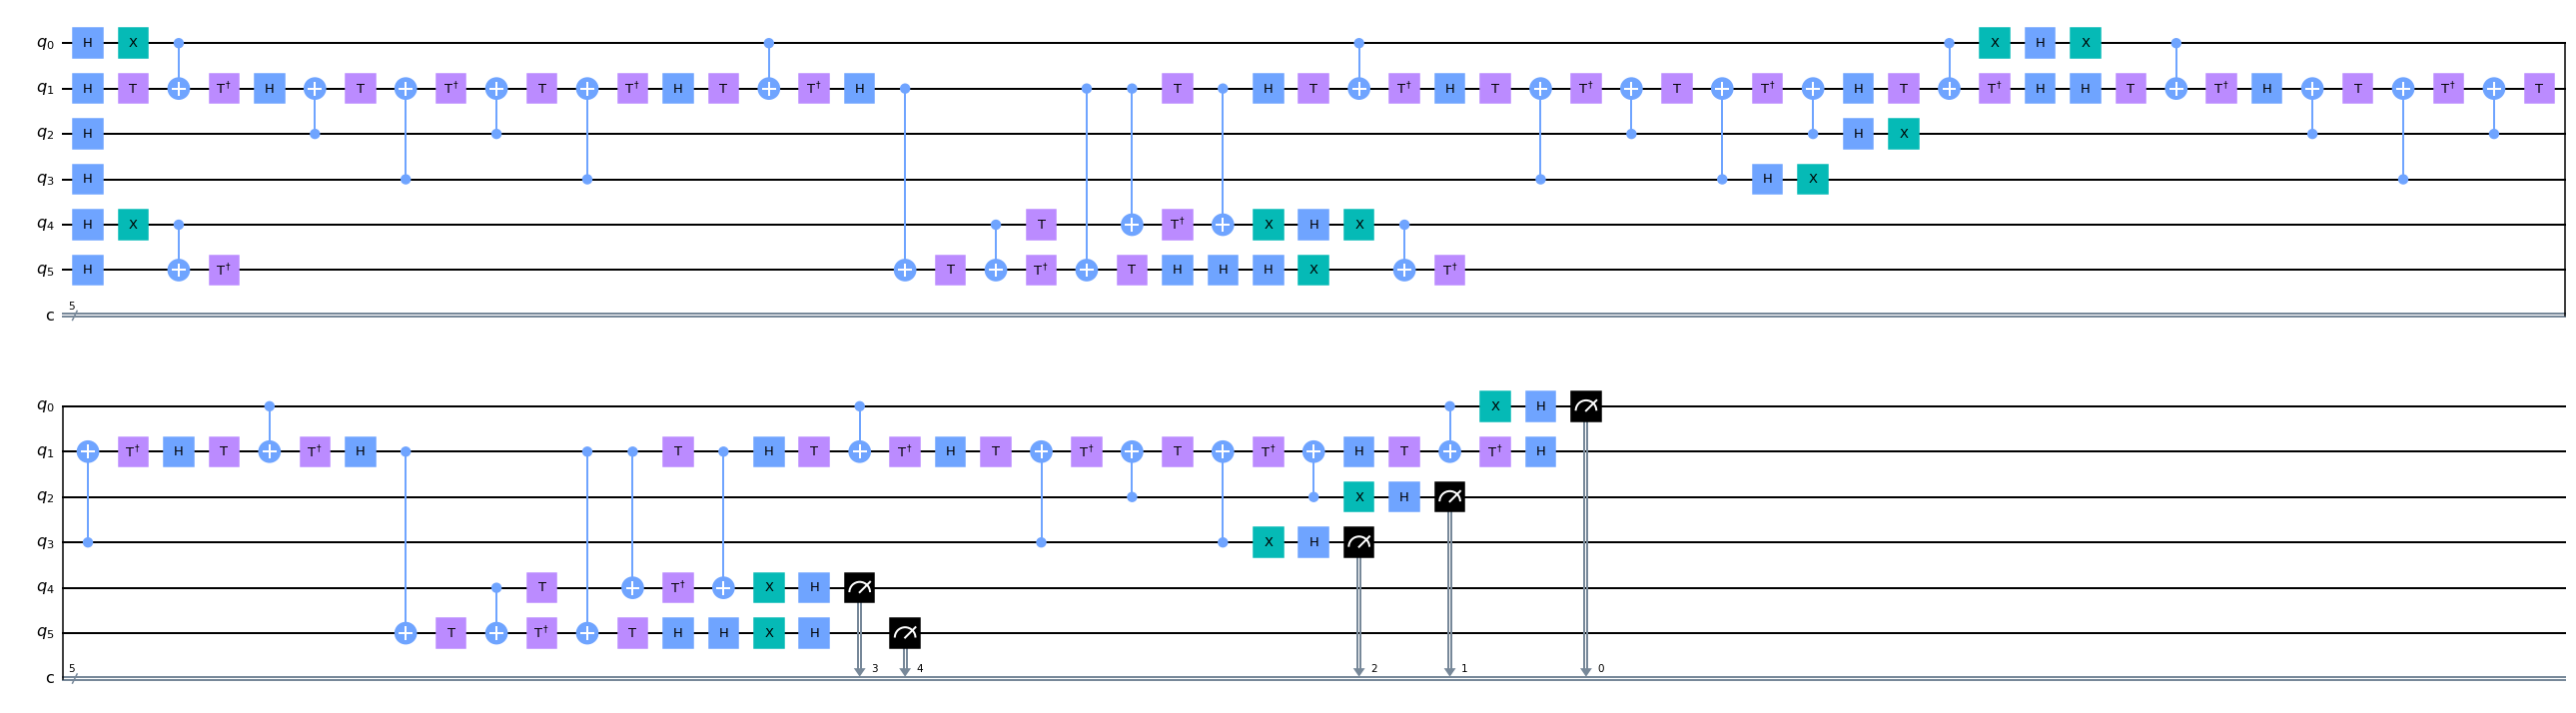

In [12]:
qc5 = qc_D5M5(sol)
print(qc5.depth())
qc5.draw('mpl', fold=55)

# D5M5 circuits, Simulator

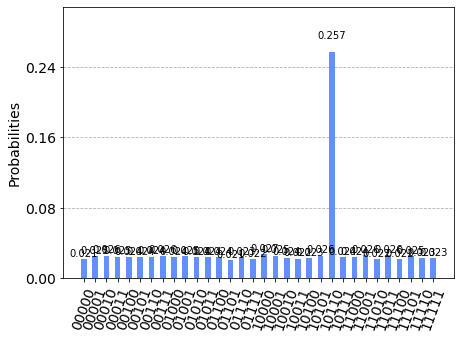

In [13]:
backend_sim = BasicAer.get_backend('qasm_simulator')

job = execute(qc5, backend_sim, shots=8192)
result = job.result()
counts = result.get_counts(qc5)

plot_histogram(counts)

# D5M5 circuits, Device

In [14]:
backend_device = provider.backend.ibm_washington

Depth:  135


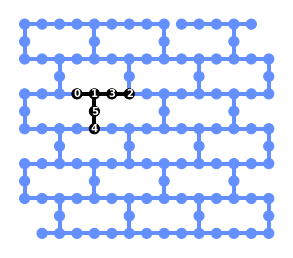

In [15]:
layout = [40,41,43,42,60,53]
qc_trans_layout = transpile(qc5, backend_device, optimization_level=3, initial_layout=layout)

print('Depth: ', qc_trans_layout.depth())
plot_circuit_layout(qc_trans_layout, backend_device)

In [50]:
shots = 8192

job_nomp_layout = execute(qc_trans_layout, backend_device, shots=shots)
job_id = job_nomp_layout.job_id()
print("Job id", job_id)


Job id 62c72196f6a6d4284f573878


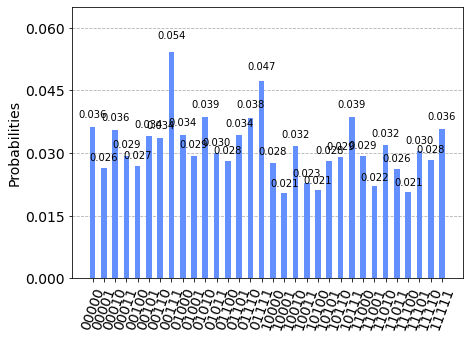

In [58]:
job_nomp_layout = backend_device.retrieve_job("62c72196f6a6d4284f573878")
result_mp_layout = job_nomp_layout.result()
count_mp_trans_layout = result_mp_layout.get_counts()
plot_histogram(count_mp_trans_layout)

# D5D5M5 circuits

177


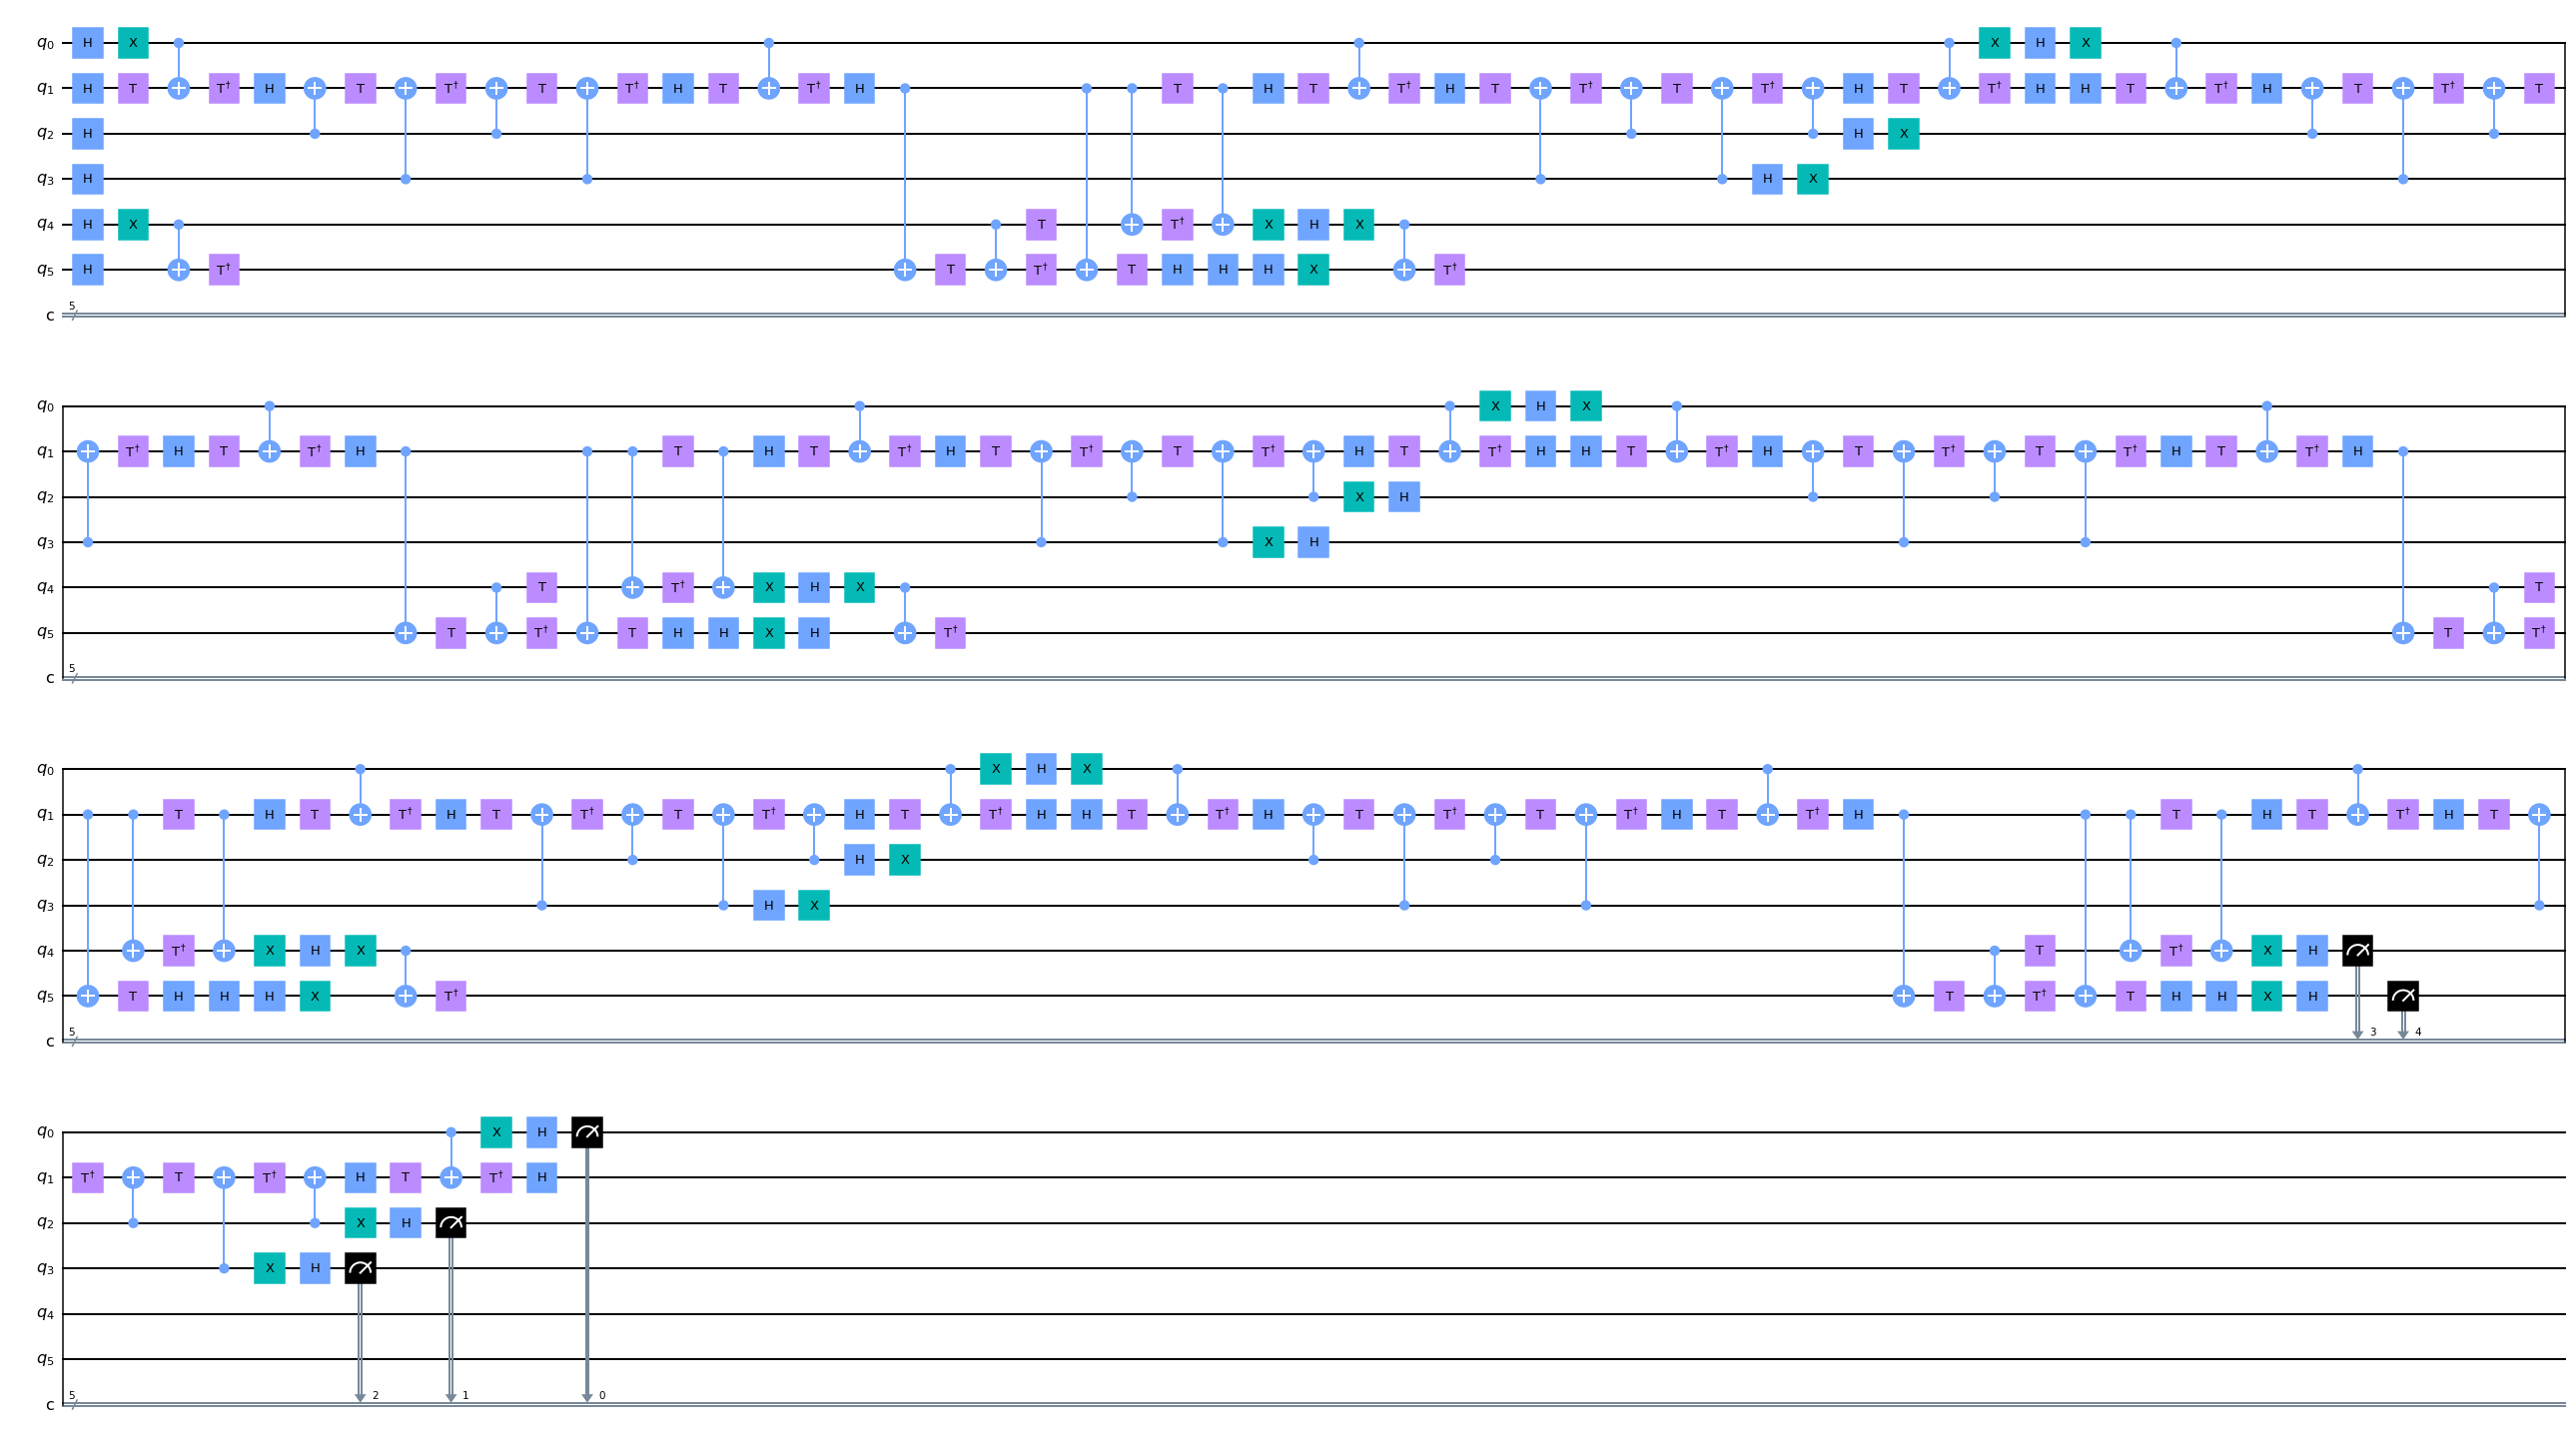

In [16]:
qc55 = qc_D5D5M5(sol)
print(qc55.depth())
qc55.draw('mpl', fold=55)


# D5D5M5 circuits, Simulator

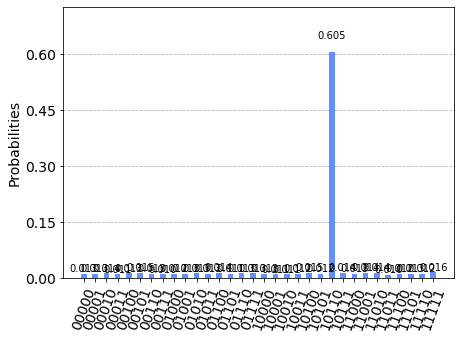

In [18]:
backend_sim = BasicAer.get_backend('qasm_simulator')

job = execute(qc55, backend_sim, shots=8192)
result = job.result()
counts = result.get_counts(qc55)

plot_histogram(counts)

# D5D5M5 circuits, Device

In [19]:
backend_device = provider.backend.ibm_washington

Depth:  269


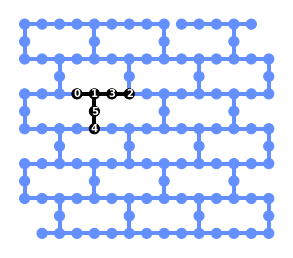

In [20]:
layout = [40,41,43,42,60,53]
qc_trans_layout = transpile(qc55, backend_device, optimization_level=3, initial_layout=layout)

print('Depth: ', qc_trans_layout.depth())
plot_circuit_layout(qc_trans_layout, backend_device)

In [ ]:
shots = 8192

job_nomp_layout = execute(qc_trans_layout, backend_device, shots=shots)
job_id = job_nomp_layout.job_id()
print("Job id", job_id)
